In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import matthews_corrcoef, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0


In [4]:
df.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'], axis=1, inplace=True)
df.head()

,Age,Outcome
0,50.0,1.0
1,31.0,0.0
2,32.0,1.0
3,21.0,0.0
4,NaN,1.0


In [5]:
df = df.dropna()

In [6]:
model = LogisticRegression()

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

model.fit(X_train, y_train)

LogisticRegression()

In [7]:
pred = model.predict(X_test)

In [9]:
accuracy = accuracy_score(pred, y_test)
print(f"accuracy = {accuracy}")

f1 = f1_score(pred, y_test)
print(f"f1 = {f1}")

recall = recall_score(pred, y_test)
print(f"recall = {recall}")

precision = precision_score(pred, y_test)
print(f"precision = {precision}")

matthew = matthews_corrcoef(pred, y_test)
print(f"matthew = {matthew}")

accuracy = 0.6244541484716157
f1 = 0.18867924528301885
recall = 0.47619047619047616
precision = 0.11764705882352941
matthew = 0.06906521281445936


<AxesSubplot:>

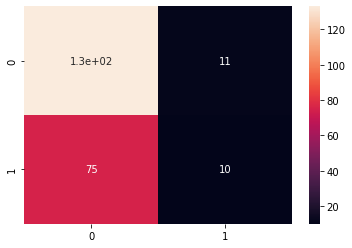

In [11]:
cm = confusion_matrix(y_test, pred, labels=[0,1])
sns.heatmap(cm, annot=True)

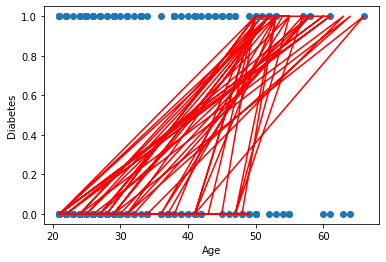

In [27]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred,color = 'r')
plt.xlabel("Age")
plt.ylabel("Diabetes")
plt.show()